# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (File -> Download as -> PDF via LaTeX). You should then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [1]:
import tensorflow as tf
from scipy.io import loadmat
from numpy.random import default_rng
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

![SVHN overview image](data/svhn_examples.jpg)
For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an  image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images. 

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [2]:
# Run this cell to load the dataset

train = loadmat('data/train_32x32.mat')
test = loadmat('data/test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [3]:
print(train.keys())
print(test.keys())
train_data = train['X']
train_target = train['y']
test_data = test['X']
test_target = test['y']

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


Random Image Number: [3]


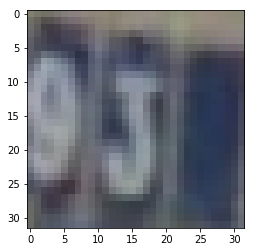

Random Image Number: [6]


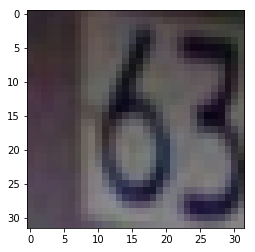

Random Image Number: [4]


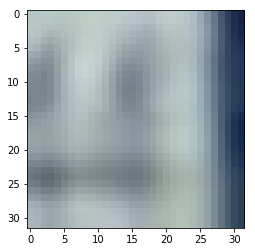

Random Image Number: [2]


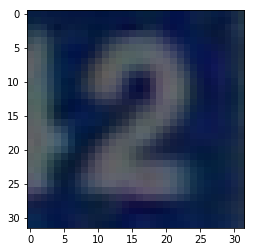

Random Image Number: [7]


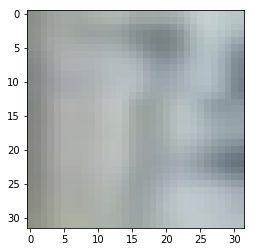

Random Image Number: [1]


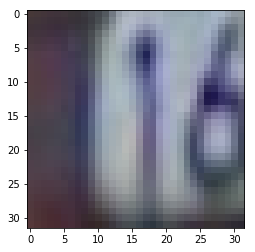

Random Image Number: [3]


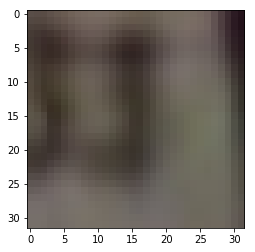

Random Image Number: [3]


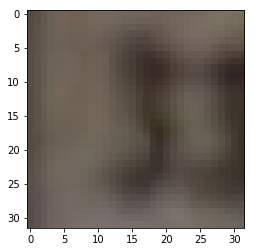

Random Image Number: [4]


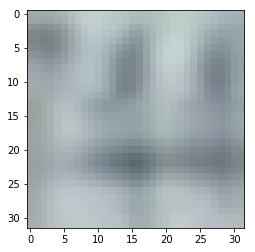

Random Image Number: [4]


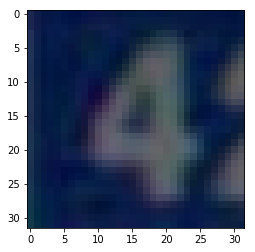

In [4]:
total_train_images = train_data.shape[0]

rng = default_rng()
random_image_index = rng.choice(total_train_images, 10, replace=False)

for i in random_image_index:
    print("Random Image Number: {label}".format(label=train_target[i]))
    plt.imshow(train_data[:, :, :, i])
    plt.show()

In [5]:
print(train_data.shape)
print(train_target.shape)
print(test_data.shape)
print(test_target.shape)

(32, 32, 3, 73257)
(73257, 1)
(32, 32, 3, 26032)
(26032, 1)


In [6]:
def convert_to_grayscale(data):
    grayed = np.zeros((np.shape(data)[3], np.shape(data)[0], np.shape(data)[1], 1))
    for i in range(np.shape(data)[0]):
        for j in range(np.shape(data)[1]):
            grayed[:, i, j, 0] = ((data[i][j][0] + data[i][j][1] + data[i][j][2])/3.0) / 255.0
            
    return grayed

In [7]:
train_data = convert_to_grayscale(train_data)
print(train_data)

test_data = convert_to_grayscale(test_data)
print(test_data)


[[[[0.13202614]
   [0.0745098 ]
   [0.06666667]
   ...
   [0.25228758]
   [0.28235294]
   [0.29673203]]

  [[0.13333333]
   [0.07973856]
   [0.06666667]
   ...
   [0.16862745]
   [0.23137255]
   [0.28888889]]

  [[0.15555556]
   [0.08496732]
   [0.07320261]
   ...
   [0.12679739]
   [0.15816993]
   [0.25359477]]

  ...

  [[0.31633987]
   [0.31372549]
   [0.29542484]
   ...
   [0.05098039]
   [0.04444444]
   [0.03921569]]

  [[0.30588235]
   [0.30980392]
   [0.30065359]
   ...
   [0.05359477]
   [0.05228758]
   [0.05228758]]

  [[0.31503268]
   [0.31764706]
   [0.30196078]
   ...
   [0.06013072]
   [0.05751634]
   [0.04183007]]]


 [[[0.28627451]
   [0.29411765]
   [0.27581699]
   ...
   [0.30980392]
   [0.30326797]
   [0.30326797]]

  [[0.29150327]
   [0.2875817 ]
   [0.26405229]
   ...
   [0.30718954]
   [0.30980392]
   [0.30849673]]

  [[0.28627451]
   [0.27843137]
   [0.21568627]
   ...
   [0.31111111]
   [0.30980392]
   [0.30980392]]

  ...

  [[0.01830065]
   [0.01568627]
   [0.0

In [8]:
print(train_data.shape)
print(test_data.shape)

(73257, 32, 32, 1)
(26032, 32, 32, 1)


Random Image Number: [3]


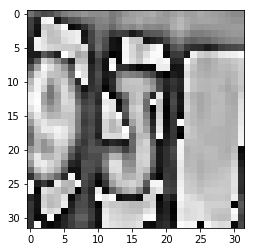

Random Image Number: [6]


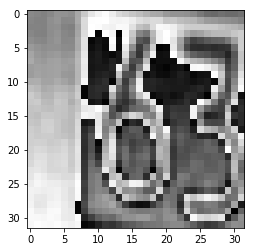

Random Image Number: [4]


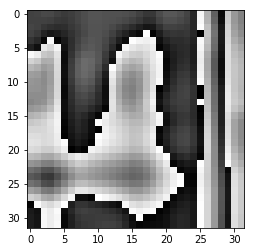

Random Image Number: [2]


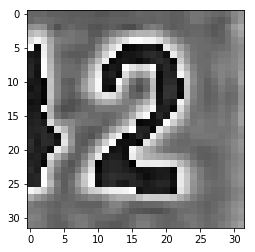

Random Image Number: [7]


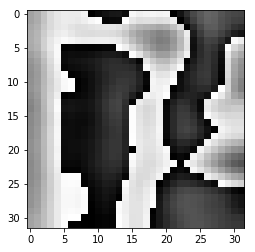

Random Image Number: [1]


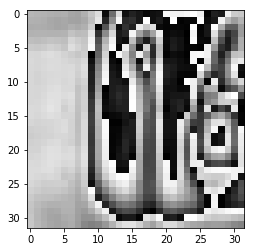

Random Image Number: [3]


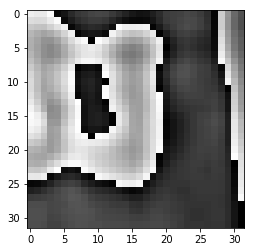

Random Image Number: [3]


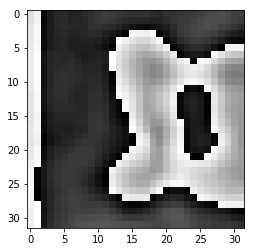

Random Image Number: [4]


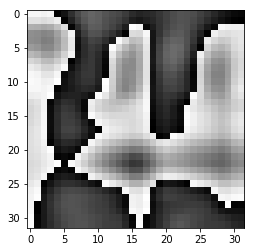

Random Image Number: [4]


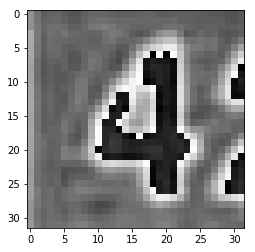

In [9]:
# 10 random numbers from train_data set
rng_2 = default_rng()
random_image_index_2 = rng_2.choice(total_train_images, 10, replace=False)

for i in random_image_index:
    print("Random Image Number: {label}".format(label=train_target[i]))
    plt.imshow(train_data[i,:,:,:][:,:,0], cmap='gray')
    plt.show()

In [10]:
# random_image_index_2
# # print(train_target[28])
# # # for i in random_image_index:
# # img = np.mean(train_target[0], axis=2)
# # print(img)
# # plt.imshow(img, cmap='gray')
# # plt.show()
# !pip install opencv-python
# import cv2

# def convert_to_grayscale(data):
#     array = []
#     for i in range(len(data)):
#         fix_img = cv2.cvtColor(data[:, :, :, i], cv2.COLOR_BGR2RGB)
#         array.append(np.mean(fix_img, axis=2))
#     return np.asarray(array)

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [11]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [12]:
def get_mlp(input_shape, weight_decay):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(128, activation='relu', name='dense_01'), #kernel_regularizer=tf.keras.regularizers.l1(weight_decay)),
        Dense(64, activation='relu', name='dense_02'), #kernel_regularizer=tf.keras.regularizers.l1(weight_decay)),
        Dense(32, activation='relu', name='dense_03'), #kernel_regularizer=tf.keras.regularizers.l1(weight_decay)),
        Dense(16, activation='relu', name='dense_04'), #kernel_regularizer=tf.keras.regularizers.l1(weight_decay)),
        Dense(11, activation='softmax', name='output_lyr') # Received a label of value 10, Hence 11 numbers
    ])
    
    return model


shape = (np.shape(train_data)[1], np.shape(train_data)[2], np.shape(train_data)[3])
model = get_mlp(shape, weight_decay = 0.001)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense_01 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_02 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_03 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_04 (Dense)             (None, 16)                528       
_________________________________________________________________
output_lyr (Dense)           (None, 11)                187       
Total params: 142,251
Trainable params: 142,251
Non-trainable params: 0
__________________________________________________

In [13]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

In [14]:
def get_checkpoint_best_only():
    file_directory = 'checkpoints_best_only/checkpoint'
    checkpoint_best_only = ModelCheckpoint(filepath=file_directory, save_best_only=True, 
                                         save_weights_only=True, monitor='val_loss',
                                         save_freq='epoch', mode='min', verbose=1)
  
    return checkpoint_best_only

def get_early_stopping():
    
    return EarlyStopping(monitor='val_loss', patience=3)


checkpoint_best_only = get_checkpoint_best_only()
early_stopping = get_early_stopping()
callbacks = [checkpoint_best_only, early_stopping]
history = model.fit(train_data, train_target, epochs = 10, batch_size = 128, validation_data=(test_data, test_target), callbacks=callbacks)

Train on 73257 samples, validate on 26032 samples
Epoch 1/10
72960/73257 [============================>.] - ETA: 0s - loss: 2.3410 - accuracy: 0.1874
Epoch 00001: val_loss improved from inf to 2.33125, saving model to checkpoints_best_only/checkpoint
73257/73257 [==============================] - 22s 305us/sample - loss: 2.3410 - accuracy: 0.1874 - val_loss: 2.3313 - val_accuracy: 0.1959
Epoch 2/10
73088/73257 [============================>.] - ETA: 0s - loss: 2.3254 - accuracy: 0.2021
Epoch 00002: val_loss improved from 2.33125 to 2.29933, saving model to checkpoints_best_only/checkpoint
73257/73257 [==============================] - 20s 273us/sample - loss: 2.3254 - accuracy: 0.2023 - val_loss: 2.2993 - val_accuracy: 0.2343
Epoch 3/10
72960/73257 [============================>.] - ETA: 0s - loss: 2.3006 - accuracy: 0.2333
Epoch 00003: val_loss improved from 2.29933 to 2.28356, saving model to checkpoints_best_only/checkpoint
73257/73257 [==============================] - 20s 270us/sa

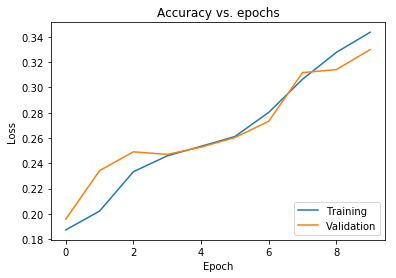

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

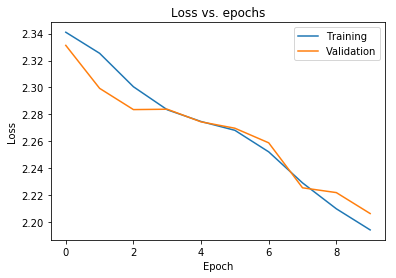

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [17]:
test_loss, test_acc = model.evaluate(test_data, test_target, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 2.206
Test accuracy: 32.98%


## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [18]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.regularizers import l2

In [19]:
def get_cnn(input_shape, dropout_rate, reg_rate):
    model = Sequential([
        Conv2D(64, kernel_size=(3,3), activation='relu', padding='SAME', input_shape=input_shape),
        MaxPooling2D(pool_size=(2,2), padding='SAME'),
        BatchNormalization(),
        Conv2D(32, kernel_size=(3,3), activation='relu'),
        MaxPooling2D(pool_size=(2,2), padding='SAME'),
        BatchNormalization(),
        Flatten(),
        Dense(64, activation = 'relu'),
        Dropout(dropout_rate),
        Dense(64, activation = 'relu'),
        Dropout(dropout_rate),
        Dense(11, activation = 'softmax'),
    ])
    
    return model
shape = np.shape(train_data)[1], np.shape(train_data)[2], np.shape(train_data)[3]
model_cnn = get_cnn(input_shape=shape, dropout_rate=0.3, reg_rate=1e-5)

In [20]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 32)          128       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)             

In [21]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model_cnn.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

In [22]:
def get_checkpoint_best_only_cnn():
    file_directory = 'checkpoints_best_only_cnn/checkpoint'
    checkpoint_best_only = ModelCheckpoint(filepath=file_directory, save_best_only=True, 
                                         save_weights_only=True, monitor='val_loss',
                                         save_freq='epoch', mode='min', verbose=1)
  
    return checkpoint_best_only

def get_early_stopping_cnn():
    return EarlyStopping(monitor='val_loss', patience=3)


checkpoint_best_only_cnn = get_checkpoint_best_only_cnn()
early_stopping_cnn = get_early_stopping_cnn()
callbacks_new = [checkpoint_best_only_cnn, early_stopping_cnn]
history_cnn = model_cnn.fit(train_data, train_target, epochs = 10, batch_size = 128, validation_data=(test_data, test_target), callbacks=callbacks_new)

Train on 73257 samples, validate on 26032 samples
Epoch 1/10
73216/73257 [============================>.] - ETA: 0s - loss: 2.0355 - accuracy: 0.5050
Epoch 00001: val_loss improved from inf to 1.99234, saving model to checkpoints_best_only_cnn/checkpoint
73257/73257 [==============================] - 675s 9ms/sample - loss: 2.0355 - accuracy: 0.5050 - val_loss: 1.9923 - val_accuracy: 0.5531
Epoch 2/10
73216/73257 [============================>.] - ETA: 0s - loss: 1.9029 - accuracy: 0.6401
Epoch 00002: val_loss improved from 1.99234 to 1.89573, saving model to checkpoints_best_only_cnn/checkpoint
73257/73257 [==============================] - 665s 9ms/sample - loss: 1.9029 - accuracy: 0.6401 - val_loss: 1.8957 - val_accuracy: 0.6456
Epoch 3/10
73216/73257 [============================>.] - ETA: 0s - loss: 1.8777 - accuracy: 0.6647
Epoch 00003: val_loss improved from 1.89573 to 1.85273, saving model to checkpoints_best_only_cnn/checkpoint
73257/73257 [==============================] - 67

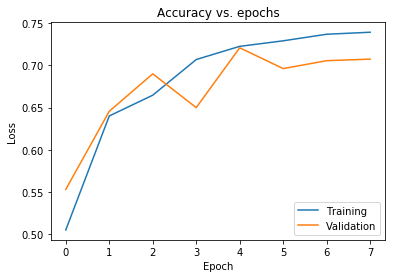

In [23]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

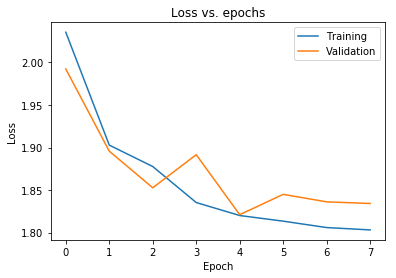

In [24]:
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [25]:
test_loss, test_acc = model_cnn.evaluate(test_data, test_target, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 1.834
Test accuracy: 70.74%


## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [26]:
best_mlp_model = model.load_weights('checkpoints_best_only/checkpoint')
best_cnn_model = model_cnn.load_weights('checkpoints_best_only_cnn/checkpoint')

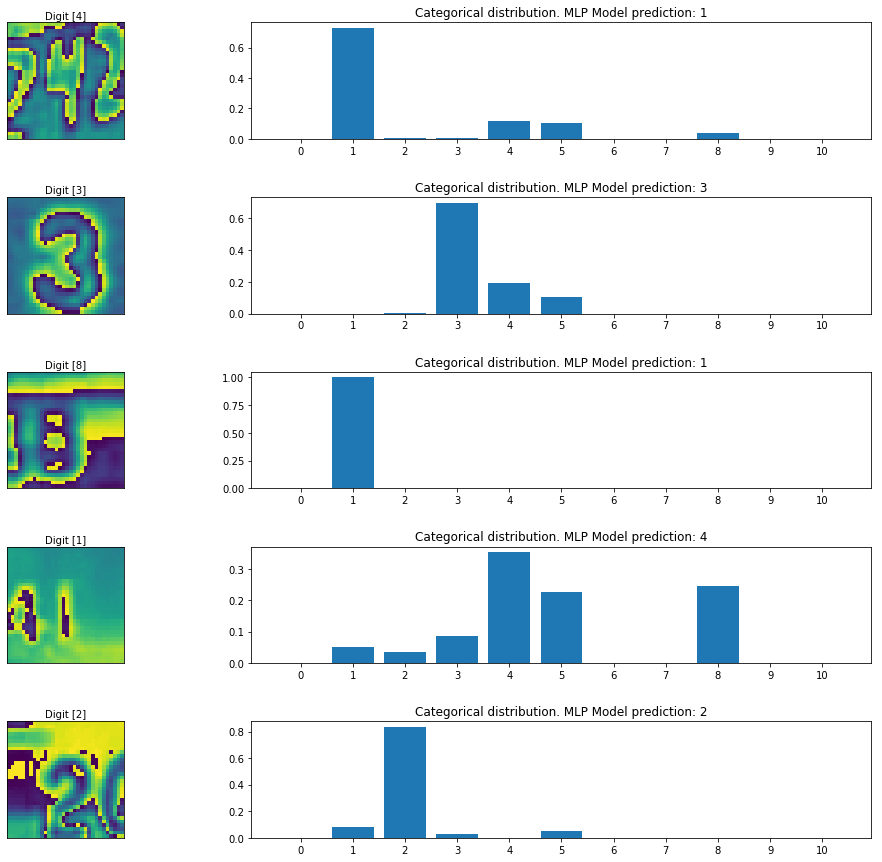

In [28]:
# 10 random numbers from test_data set
total_test_images = test_data.shape[0]
rng_test = default_rng()
random_image_index_test = rng_test.choice(total_test_images, 5, replace=False)
random_test_images = test_data[random_image_index_test, ...]
random_test_target = test_target[random_image_index_test, ...]

mlp_prediction = model.predict(random_test_images)

# MLP PREDICTION
fig, axes = plt.subplots(5, 2, figsize=(20, 15))
fig.subplots_adjust(hspace=0.5, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(mlp_prediction, random_test_images, random_test_target)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. MLP Model prediction: {np.argmax(prediction)}")
    
plt.show()


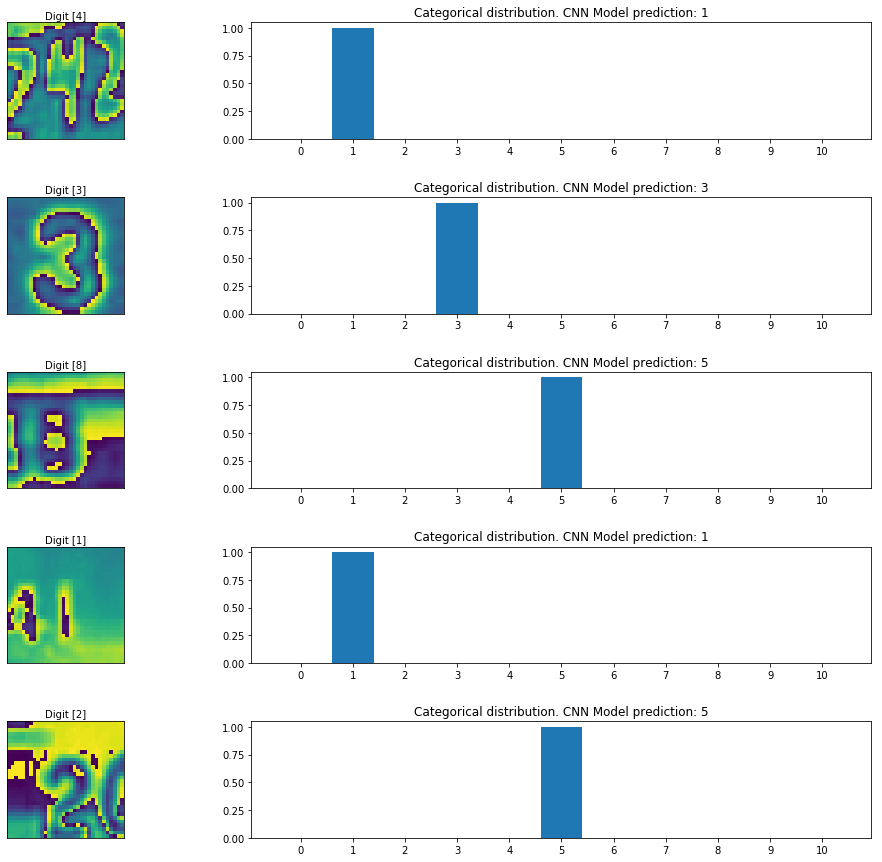

In [29]:
# CNN PREDICTION
cnn_prediction = model_cnn.predict(random_test_images)
# MLP PREDICTION
fig, axes = plt.subplots(5, 2, figsize=(20, 15))
fig.subplots_adjust(hspace=0.5, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(cnn_prediction, random_test_images, random_test_target)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. CNN Model prediction: {np.argmax(prediction)}")
    
plt.show()